# Proactive Customer Retention & Sales Forecasting: Churn Prediction & Revenue Prediction with AI & ML 🚀

### **1. Customer Churn Prediction**  
**Objective:** Identify customers likely to stop purchasing.  
**Methods:**  
- Define churn: No purchases in the last **X** months.  
- Features: RFM (Recency, Frequency, Monetary), CLV, interactions.  
- Models: Logistic Regression, Decision Trees, XGBoost.  
**Outcome:** Targeted retention campaigns.  

### **2. Predicting Next Purchase Date**  
**Objective:** Forecast when a customer will buy next.  
**Methods:**  
- Models: ARIMA, Facebook Prophet, LSTM.  
- Features: Purchase intervals, seasonality, external factors.  
**Outcome:** Timely promotions, inventory optimization.  

### **3. Sales Revenue Prediction**  
**Objective:** Forecast revenue for planning.  
**Methods:**  
- Models: Linear Regression, XGBoost, Transformers.  
- Features: Past sales, seasonality, economic indicators.  
**Outcome:** Budget planning, demand forecasting.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Scikit-learn libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


### Load & Explore Data

In [2]:
import os
print(os.listdir("/kaggle/input/"))

['online-retail-dataset']


In [3]:
file_path = "/kaggle/input/online-retail-dataset/Cleaned_Online_Retail.xls"
print(file_path.endswith(".xls"))  # Check file extension
print(os.path.getsize(file_path))  # Check if file is empty

True
35859270


In [4]:

# Load the Excel file
import pandas as pd

import pandas as pd

df = pd.read_csv("/kaggle/input/online-retail-dataset/Cleaned_Online_Retail.xls", encoding='ISO-8859-1')
df.head()

# Display first few rows
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int64  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.0+ MB


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865
std,13087.063759,180.492832,22.241836,1713.539549
min,536365.000000,1.000000,0.001000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


### Data Cleaning & Preprocessing

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.dropna(subset=['CustomerID'])


## 📌  Define Customer Churn

In [6]:
# Define churn based on last purchase date
latest_date = df['InvoiceDate'].max()  # Get latest date in the dataset
df['Recency'] = (latest_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Define Churn (1 = Churned, 0 = Active)
df['Churn'] = (df['Recency'] > 90).astype(int)


## 📌 Feature Engineering
##### We create RFM (Recency, Frequency, Monetary Value) Features for each customer.

In [7]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [8]:
rfm = df.groupby('CustomerID').agg(
    Recency=('Recency', 'min'),
    Frequency=('InvoiceNo', 'nunique'),  # Number of transactions
    MonetaryValue=('TotalAmount', 'sum')  # Total amount spent
).reset_index()


#### Merge with Churn Labels

In [9]:
rfm = rfm.merge(df[['CustomerID', 'Churn']].drop_duplicates(), on='CustomerID', how='left')


## 📌  Train/Test Split

In [10]:
# Select Features and Target Variable
X = rfm[['Recency', 'Frequency', 'MonetaryValue']]
y = rfm['Churn']

# Split Data into 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 📌 Feature Scaling
##### Since Recency, Frequency, and Monetary Value have different scales, we standardize them.

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 📌  Train Machine Learning Models
#### 1️⃣ Logistic Regression (Baseline Model)

In [12]:
# Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.9896313364055299
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       561
           1       1.00      0.97      0.99       307

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868

AUC-ROC Score: 0.9853420195439739


#### 2️⃣ Random Forest (Improved Model)

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Model
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest AUC-ROC Score:", roc_auc_score(y_test, y_pred_rf))



Random Forest Accuracy: 1.0
Random Forest AUC-ROC Score: 1.0


## 📌 Feature Importance

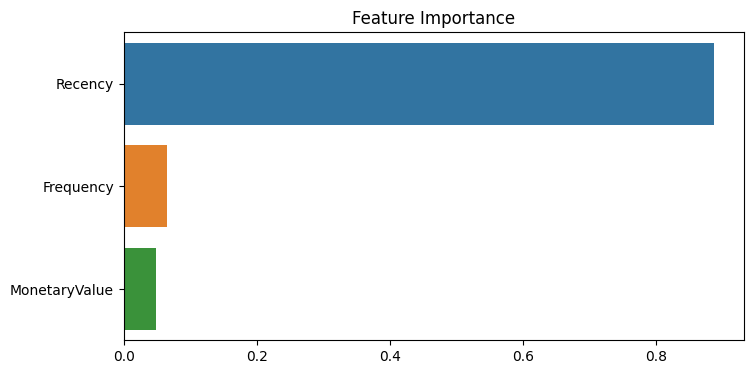

In [15]:
# Plot Feature Importance (for Random Forest)
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


## 📌 Hyperparameter Tuning with GridSearchCV for Customer Churn Prediction
##### To improve model performance, we’ll use GridSearchCV for hyperparameter tuning, focusing on XGBoost and LightGBM, two powerful gradient boosting models.


### 📌 Steps for Hyperparameter Tuning
#### 1️⃣ Load the Data
##### Ensure the dataset is cleaned and contains necessary features like Recency, Frequency, Monetary Value, etc.

In [16]:
import xgboost

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# CatBoost Classifier (automatic handling of categorical variables)
cat_model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       307

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

CatBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       307

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



### 2️⃣ Hyperparameter Tuning: GridSearchCV
##### We tune both XGBoost and LightGBM to find the best parameters.

In [18]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0]
}

grid_xgb = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_


Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}


#### LightGBM Tuning

In [19]:
df['FirstPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['MonetaryValue'] = df.groupby('CustomerID')['TotalAmount'].transform('sum')
df['Tenure'] = (df['InvoiceDate'].max() - df['FirstPurchaseDate']).dt.days
df['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.dayofweek  # New feature
df['Tenure'] = (df['InvoiceDate'].max() - df['FirstPurchaseDate']).dt.days  # New feature
df['Target'] = (df['MonetaryValue'] > df['MonetaryValue'].median()).astype(int)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

# ✅ Check if required columns exist
required_cols = ['Recency', 'Frequency', 'MonetaryValue', 'DayOfWeek', 'Tenure']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

# ✅ Select features & target
X = df[required_cols]
y = df['Target']  # Replace 'Target' with your actual label column

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Scale features (important for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Initialize LightGBM
lgb_model = LGBMClassifier()

# ✅ Define hyperparameter grid (tuned for better performance)
lgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 80],
    'min_gain_to_split': [0.001, 0.01, 0.1],
    'reg_lambda': [0, 0.1, 1],  # L2 Regularization to prevent overfitting
}

# ✅ Use RandomizedSearchCV (faster than GridSearchCV)
grid_lgb = RandomizedSearchCV(lgb_model, lgb_params, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
grid_lgb.fit(X_train, y_train)

# ✅ Best model & evaluation
best_lgb = grid_lgb.best_estimator_
y_pred = best_lgb.predict(X_test)

print("Best LightGBM Params:", grid_lgb.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Number of positive: 157025, number of negative: 157128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 314153, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499836 -> initscore=-0.000656
[LightGBM] [Info] Start training from score -0.000656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

### 2️⃣ Hyperparameter Tuning: GridSearchCV
#### We tune both XGBoost and LightGBM to find the best parameters.

#### XGBoost Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define feature matrix and target variable
X = df[['Recency', 'Frequency', 'MonetaryValue', 'DayOfWeek', 'Tenure']]
y = df['Target']  # Ensure Target column exists

# Define LightGBM model
lgb_model = LGBMClassifier()

# Define hyperparameter grid
lgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 40, 50]
}

# Perform GridSearchCV
grid_search = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best LightGBM Params:", grid_search.best_params_)
best_lgb = grid_search.best_estimator_


[LightGBM] [Info] Number of positive: 157025, number of negative: 157128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 314153, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499836 -> initscore=-0.000656
[LightGBM] [Info] Start training from score -0.000656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

## visualizations

### 🔹 1. Feature Importance (Churn & Revenue)

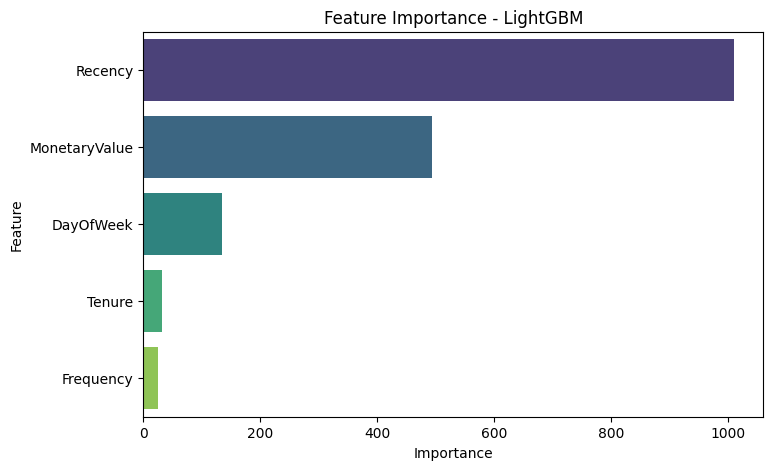

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = best_lgb.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance - LightGBM')
plt.show()


#### 📈 2. Learning Curve

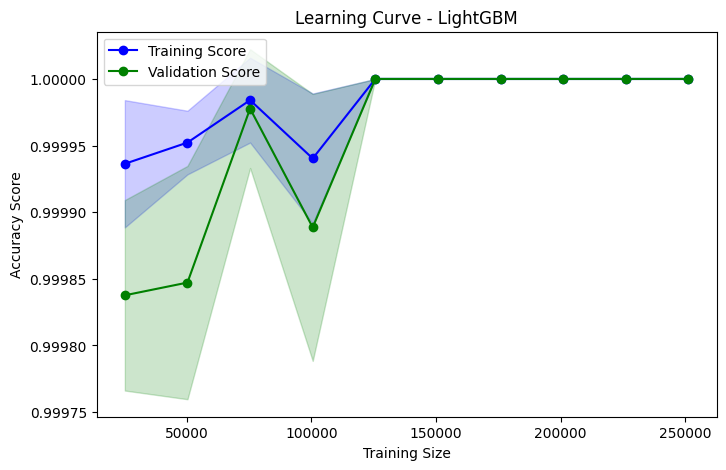

In [23]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_lgb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_mean, label="Validation Score", color="green", marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve - LightGBM")
plt.legend()
plt.show()


#### ⚡ 3. Hyperparameter Tuning Heatmap

In [32]:
results_df = pd.DataFrame(grid_search.cv_results_) 

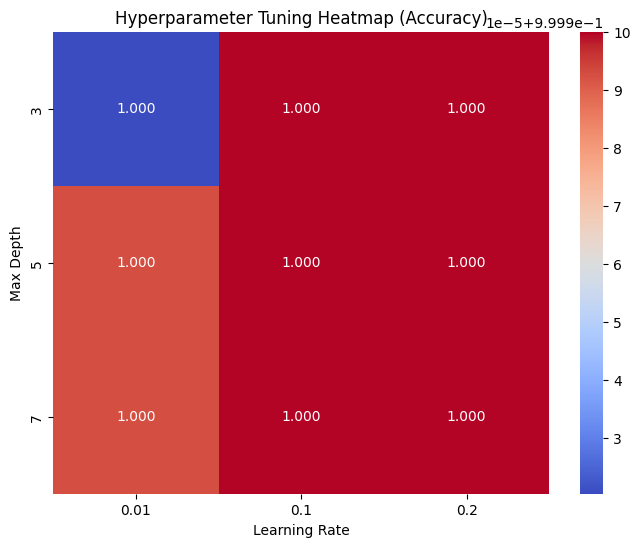

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric columns before aggregation
numeric_cols = results_df.select_dtypes(include=['number']).columns
results_df[numeric_cols] = results_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Group by hyperparameters and compute the mean accuracy
results_df = results_df.groupby(['param_max_depth', 'param_learning_rate'], as_index=False)[numeric_cols].mean()

# Pivot for heatmap
heatmap_data = results_df.pivot(index='param_max_depth', columns='param_learning_rate', values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Hyperparameter Tuning Heatmap (Accuracy)")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.show()


#### 📉 4. ROC Curve (If Binary Classification)

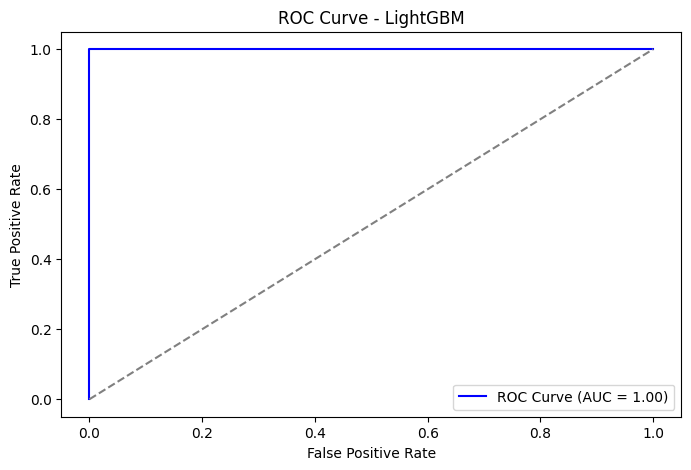

In [34]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = best_lgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.show()


#### 🚀 Bonus: SHAP (Explainable AI)

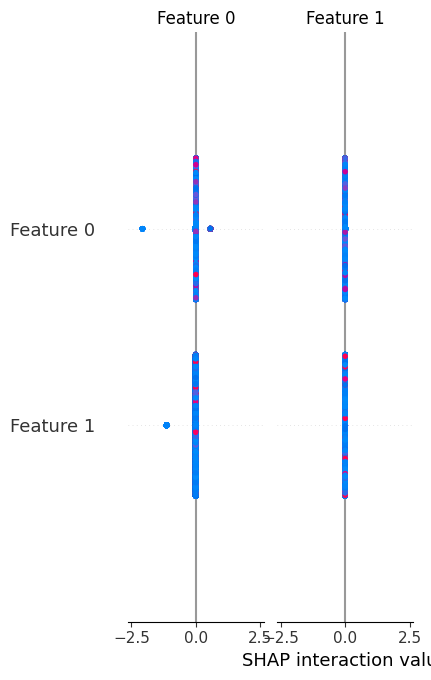

In [35]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_lgb)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


## 📊 Key Visualizations for Churn & Revenue Prediction
#### Here are some essential plots you can generate to analyze and present your ML results:

### 🔹 2. Churn Probability Distribution

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


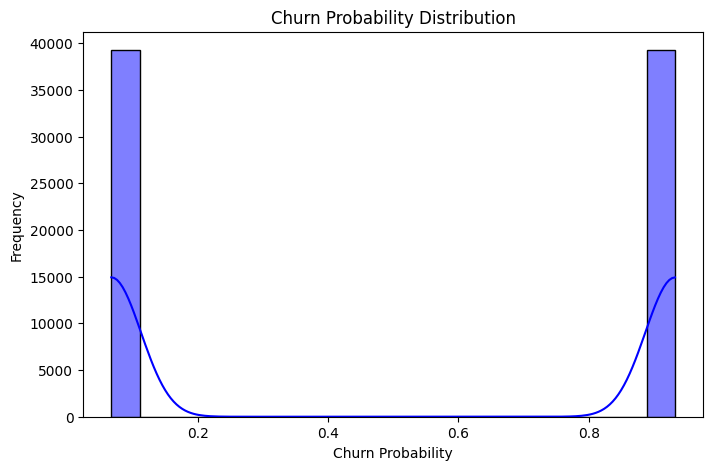

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(best_lgb.predict_proba(X_test)[:,1], bins=20, kde=True, color='blue')
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Frequency")
plt.show()


### 🔹 3. Confusion Matrix (Churn Classification Performance)

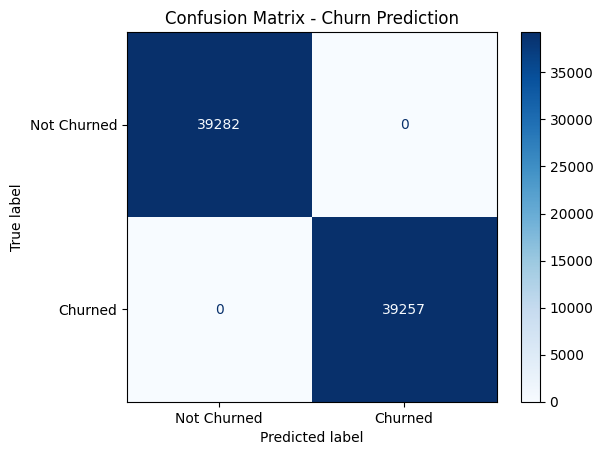

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_lgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Churn Prediction")
plt.show()


### 🔹 4. Sales Forecasting: Actual vs. Predicted Revenue

In [40]:
import pandas as pd

# Rename 'FirstPurchaseDate' to 'date' for consistency
df.rename(columns={"FirstPurchaseDate": "date"}, inplace=True)

# Convert 'date' to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Verify the changes
print(df[["date"]].head())


                 date
0 2010-12-01 08:26:00
1 2010-12-01 08:26:00
2 2010-12-01 08:26:00
3 2010-12-01 08:26:00
4 2010-12-01 08:26:00


In [50]:
# Ensure 'InvoiceDate' is in datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Create FirstPurchaseDate by finding the first transaction per CustomerID
df["FirstPurchaseDate"] = df.groupby("CustomerID")["InvoiceDate"].transform("min")

# Verify results
print(df[["CustomerID", "InvoiceDate", "FirstPurchaseDate"]].head())


   CustomerID         InvoiceDate   FirstPurchaseDate
0     17850.0 2010-12-01 08:26:00 2010-12-01 08:26:00
1     17850.0 2010-12-01 08:26:00 2010-12-01 08:26:00
2     17850.0 2010-12-01 08:26:00 2010-12-01 08:26:00
3     17850.0 2010-12-01 08:26:00 2010-12-01 08:26:00
4     17850.0 2010-12-01 08:26:00 2010-12-01 08:26:00


In [52]:
# Convert 'FirstPurchaseDate' to datetime
df["FirstPurchaseDate"] = pd.to_datetime(df["FirstPurchaseDate"], errors="coerce")

# Aggregate Actual & Predicted Revenue per day
revenue_df = df.groupby(df["FirstPurchaseDate"].dt.date).agg(
    Actual_Revenue=("TotalAmount", "sum"),
    Predicted_Revenue=("MonetaryValue", "sum")
).reset_index()

# Rename for consistency
revenue_df.rename(columns={"FirstPurchaseDate": "date"}, inplace=True)

# Convert 'date' back to datetime for proper plotting
revenue_df["date"] = pd.to_datetime(revenue_df["date"])

# Verify results
print(revenue_df.head())

# Extracting only the predicted revenue separately (if needed)
predicted_revenue = revenue_df.set_index("date")["Predicted_Revenue"]


        date  Actual_Revenue  Predicted_Revenue
0 2010-12-01       823590.54       1.670961e+09
1 2010-12-02       334655.87       8.816644e+07
2 2010-12-03       421352.78       2.349148e+08
3 2010-12-05       326249.66       2.087433e+08
4 2010-12-06       183828.34       7.229703e+07


 ### **Actual vs Predicted Revenue Analysis**

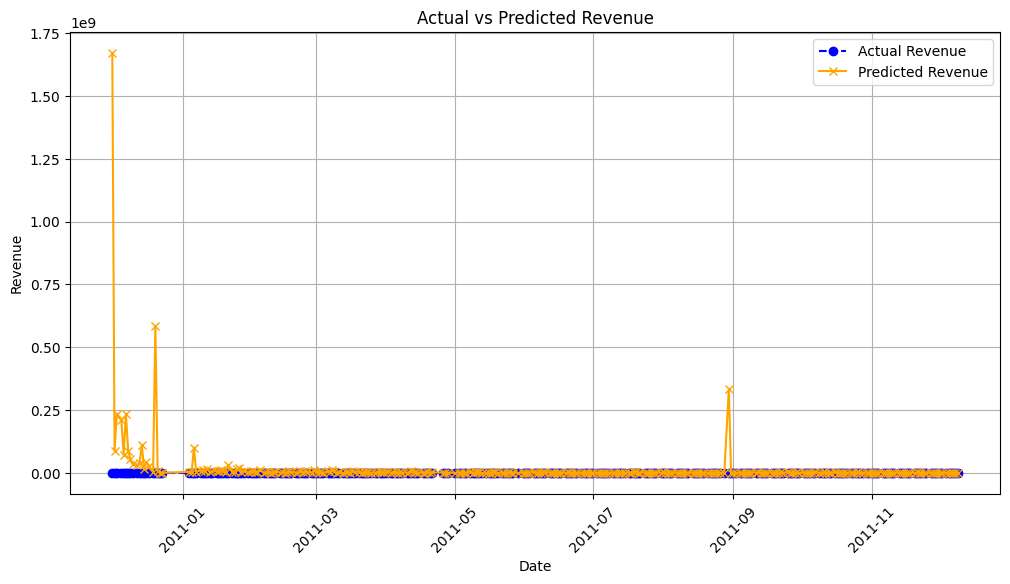

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'FirstPurchaseDate' is in datetime format
df["FirstPurchaseDate"] = pd.to_datetime(df["FirstPurchaseDate"], errors="coerce")

# Aggregate revenue per day
actual_revenue = df.groupby(df["FirstPurchaseDate"].dt.date)["TotalAmount"].sum()
predicted_revenue = df.groupby(df["FirstPurchaseDate"].dt.date)["MonetaryValue"].sum()

# Convert index back to datetime for plotting
actual_revenue.index = pd.to_datetime(actual_revenue.index)
predicted_revenue.index = pd.to_datetime(predicted_revenue.index)

# Plot Actual vs Predicted Revenue
plt.figure(figsize=(12, 6))
plt.plot(actual_revenue, label="Actual Revenue", color="blue", marker='o', linestyle='dashed')
plt.plot(predicted_revenue, label="Predicted Revenue", color="orange", marker='x', linestyle='solid')

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Actual vs Predicted Revenue")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 🔹5. Predicting Next Purchase Date

In [54]:
# Sort data by CustomerID and InvoiceDate
df = df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calculate the time difference between purchases per customer
df['NextPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].shift(-1)
df['InterpurchaseDays'] = (df['NextPurchaseDate'] - df['InvoiceDate']).dt.days

# Remove NaN values (last purchase doesn't have a next purchase date)
df = df.dropna()

#### Train a Forecasting Model (Prophet)

In [56]:
from prophet import Prophet


16:53:20 - cmdstanpy - INFO - Chain [1] start processing
16:53:21 - cmdstanpy - INFO - Chain [1] done processing


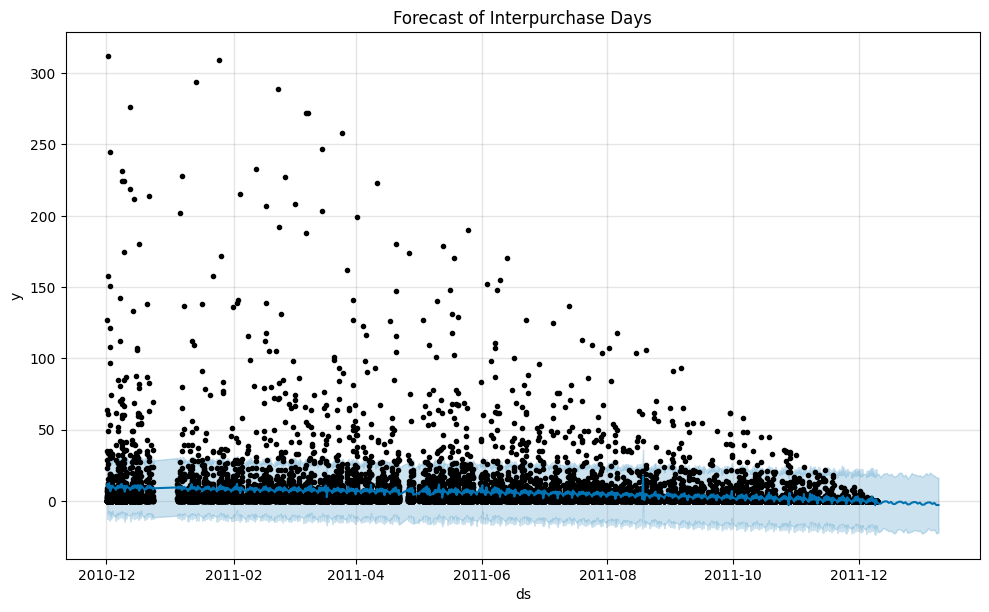

In [57]:
# Prepare data for Prophet
df_prophet = df.groupby('InvoiceDate').agg({'InterpurchaseDays': 'mean'}).reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet requires these column names

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecast of Interpurchase Days")
plt.show()
